In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7648\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
df.shape

(20640, 10)

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### EDA & Feature Engineering

<Axes: >

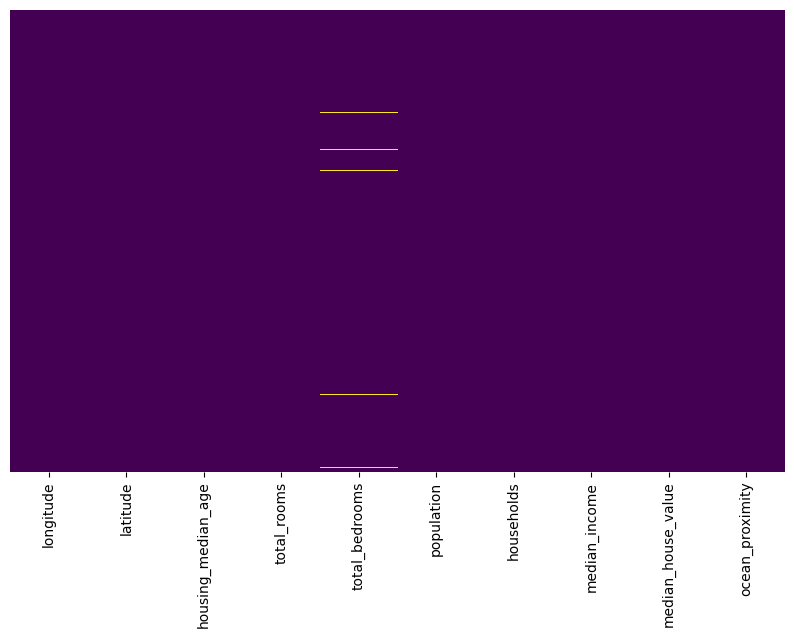

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df['total_bedrooms'].head()

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64

In [8]:
df.groupby('ocean_proximity').size().reset_index().rename(columns={0:'ocean_proximity_count'})

,ocean_proximity,ocean_proximity_count
0,<1H OCEAN,9136
1,INLAND,6551
2,ISLAND,5
3,NEAR BAY,2290
4,NEAR OCEAN,2658


<Axes: xlabel='ocean_proximity'>

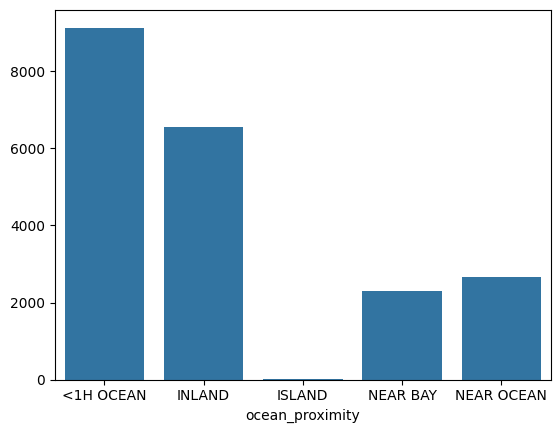

In [9]:
sns.barplot(df.groupby('ocean_proximity').size())

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

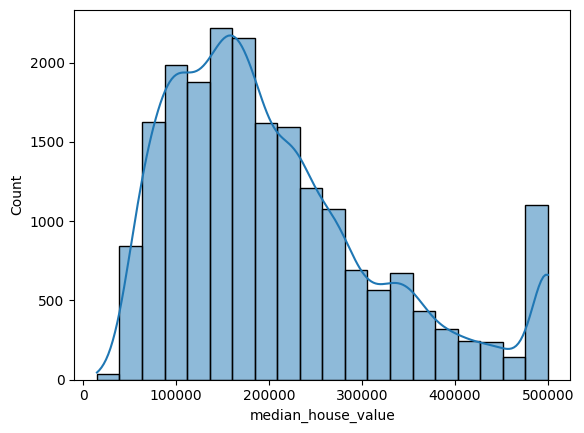

In [13]:
sns.histplot(data=df,x='median_house_value',bins=20,kde=True)

<Axes: xlabel='median_house_value'>

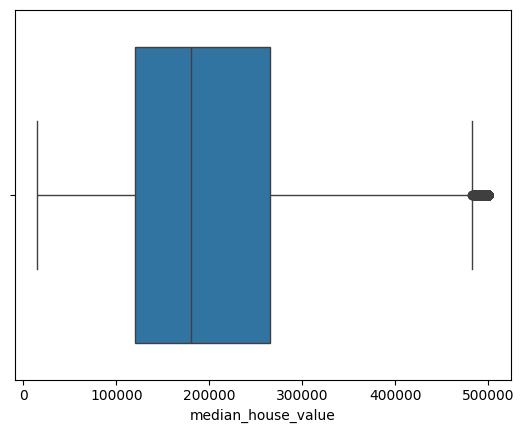

In [14]:
sns.boxplot(data=df,x='median_house_value')

In [15]:
correlation=df.corr(numeric_only=True)
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

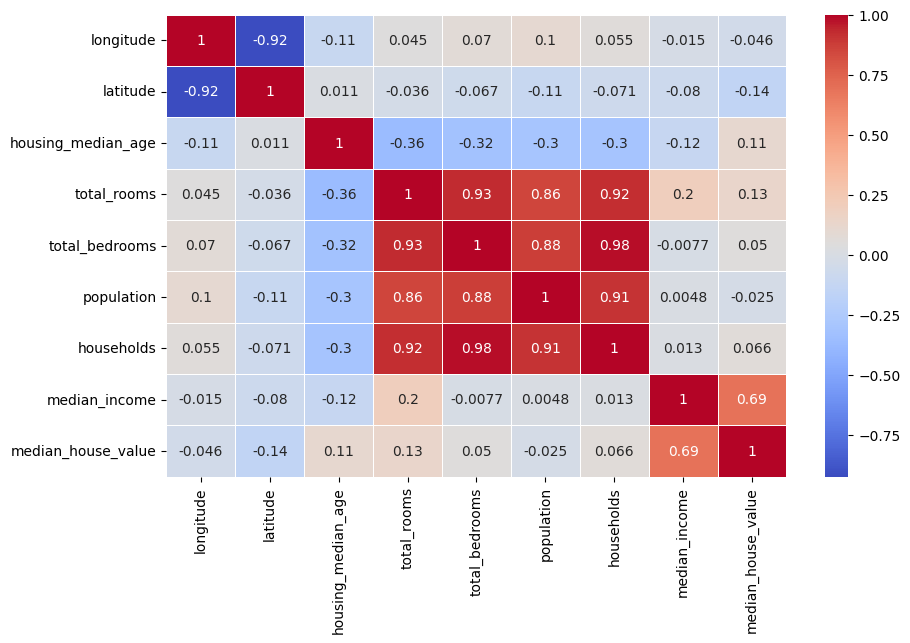

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm',linewidth=0.5)

### Encoding & Feature Scaling

In [21]:
## Filling missing Values
df['total_bedrooms']=df['total_bedrooms'].fillna(round(df['total_bedrooms'].mean(),2))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [23]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
## Encode the Categorical Columns
df_dummies=pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True,dtype=int)
df_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [26]:
df_dummies.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
X=df_dummies.drop('median_house_value',axis=1)
y=df['median_house_value']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)
min_max_scaler=MinMaxScaler()

In [30]:
## Feature Scaling
scaling_columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X_train[scaling_columns]=min_max_scaler.fit_transform(X_train[scaling_columns])
X_test[scaling_columns]=min_max_scaler.transform(X_test[scaling_columns])

In [32]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8158,0.620518,0.134043,0.705882,0.045679,0.051210,0.024020,0.055747,0.256162,0,0,0,0
18368,0.236056,0.490426,0.803922,0.064373,0.067039,0.026738,0.065285,0.334264,0,0,0,0
19197,0.165339,0.627660,0.686275,0.049367,0.052142,0.019844,0.052130,0.235804,0,0,0,0
3746,0.591633,0.171277,0.607843,0.077776,0.078212,0.032400,0.083703,0.404850,0,0,0,0
13073,0.300797,0.640426,0.313725,0.041177,0.054159,0.019703,0.055419,0.128860,1,0,0,0


# Modeling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet


# 4. Building Multiple Linear Regression Model
print("\nBuilding and training Multiple Linear Regression model...")
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lin = lin_reg.predict(X_test)

# Print the coefficients and intercept
print("\nLinear Regression Coefficients:")
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

# Match coefficients to the feature names
for feature, coef in zip(X.columns, lin_reg.coef_):
    print(f"{feature}: {coef}")

print("\nMultiple Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin)}")


# Predictions and evaluation
y_pred_lin = lin_reg.predict(X_test)
print("\nMultiple Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin)}")


# 5. Polynomial Regression
print("\nBuilding Polynomial Regression model...")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions and evaluation
y_pred_poly = poly_reg.predict(X_test_poly)
print("\nPolynomial Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_poly)}")


# 6. Lasso Regression
print("\nBuilding Lasso Regression model...")
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")


# 7. Ridge Regression
print("\nBuilding Ridge Regression model...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")


# 8. Random Forest Regressor
print("\nBuilding Random Forest Regressor model...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")


# 9. SVM Regressor
print("\nBuilding Support Vector Regressor (SVM) model...")
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_reg.predict(X_test)
print("\nSVM Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svm)}")


# 10. Decision Tree Regressor
print("\nBuilding Decision Tree Regressor model...")
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree = tree_reg.predict(X_test)
print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tree)}")



# Building Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train, y_train)

# Predictions and evaluation
y_pred_elastic = elastic_net.predict(X_test)

print("\nElastic Net Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_elastic)}")




# 11. Model Evaluation Metrics Comparison (MAE)
print("\nComparing Models' Performance:")
models = ['Linear Regression', 'Polynomial Regression', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', 'SVM', 'Decision Tree']
mae_values = [
    mean_absolute_error(y_test, y_pred_lin),
    mean_absolute_error(y_test, y_pred_poly),
    mean_absolute_error(y_test, y_pred_lasso),
    mean_absolute_error(y_test, y_pred_ridge),
    mean_absolute_error(y_test, y_pred_elastic),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_svm),
    mean_absolute_error(y_test, y_pred_tree)
]



for model, mae in zip(models, mae_values):
    print(f"{model} - MAE: {mae:.2f}")



Building and training Multiple Linear Regression model...

Linear Regression Coefficients:
Intercept: 255092.95253422775
Coefficients: [ -270811.52711777  -239226.48777219    55838.04787459  -237090.66212574
   686543.76320941 -1354302.51108233   266311.40179778   569890.52758441
   -39963.01854228   135646.5900403     -5971.74081213     3683.83349556]
longitude: -270811.5271177744
latitude: -239226.48777219412
housing_median_age: 55838.047874588476
total_rooms: -237090.6621257381
total_bedrooms: 686543.7632094088
population: -1354302.5110823342
households: 266311.4017977775
median_income: 569890.5275844084
ocean_proximity_INLAND: -39963.018542280304
ocean_proximity_ISLAND: 135646.5900403015
ocean_proximity_NEAR BAY: -5971.740812133416
ocean_proximity_NEAR OCEAN: 3683.8334955565188

Multiple Linear Regression Performance:
Mean Absolute Error: 50329.95565544729

Multiple Linear Regression Performance:
Mean Absolute Error: 50329.95565544729

Building Polynomial Regression model...

Poly